# Shifted schwefel's problem function minimization

The goal is to optimize (minimize more precisely) the shifted-Schwefel's problem cost function which is unimodal meaning it has a unique global optimum

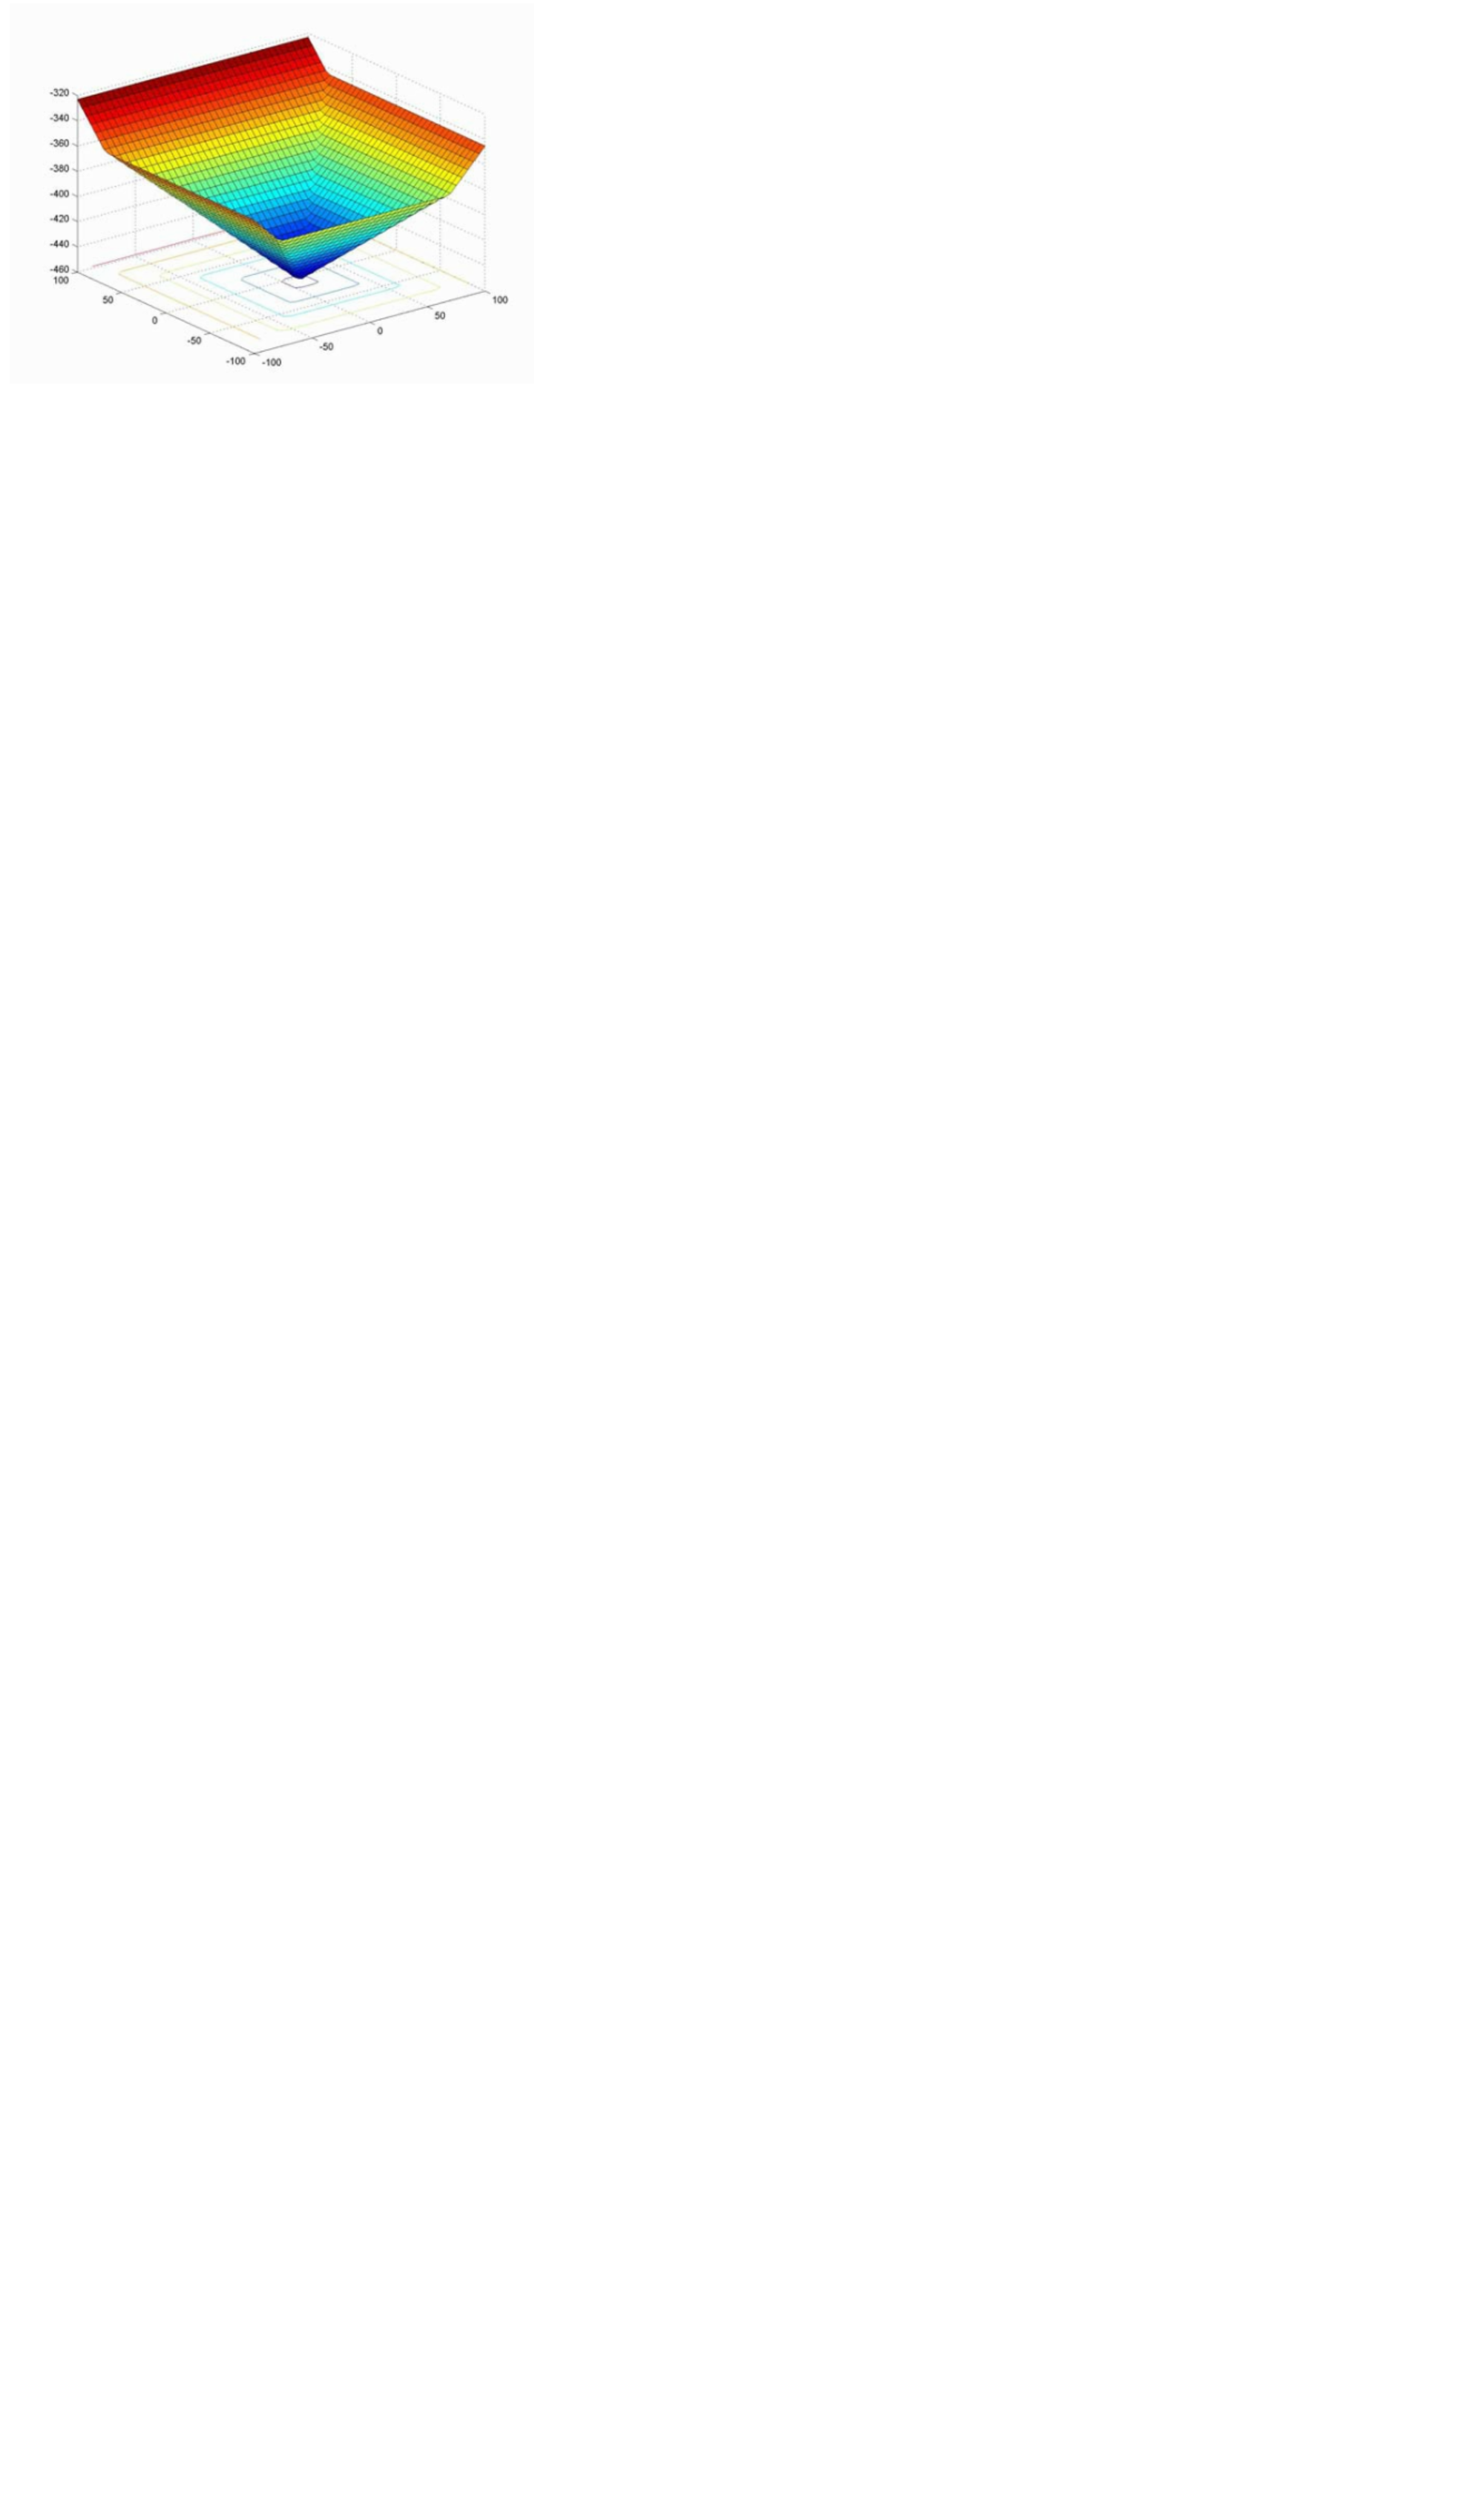

In [3]:
# Import necessaries librairies
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# if not installed
#!pip install autograd
from autograd import grad, jacobian

In [13]:
#Define a bias for the function
f_bias = -450
d50 = 50
shift  = np.random.uniform(-100,100,d50)

In [15]:
def shifted_schwefel(x):
    """Shifted-Schwefel objective function.

    Has a global minimum at -450 (because of the bias we added).

    Parameters
    ----------
    x : numpy.ndarray
        The input of the function

    Returns a numpy.ndarray
    """
    j = max(abs(x-shift))

    return j + f_bias

In [16]:
# Define a random initial solution for dimension 50
x_0_50 = np.random.uniform(-100,100,d50)

In [17]:
# Define the boundairies of the shifted sphere function
min_bound_50 = -100 * np.ones(d50)
max_bound_50 = 100 * np.ones(d50)
bounds_50 = (min_bound_50, max_bound_50)

In [18]:
# Define a callback this will helps to plot our results
history = []
def callbackf(x):
    fobj = shifted_schwefel(x)
    history.append(fobj)

In [19]:
# Compute derivative of the function
jacobian_cost = jacobian(shifted_schwefel)

In [20]:
#Set maximum number of iterations
MAX_ITER = 1000

In [33]:
res_jac_50 = minimize(shifted_schwefel, x_0_50,jac = jacobian_cost,method='SLSQP', callback=callbackf, options={'disp': True, 'maxiter': MAX_ITER})
res_jac_50

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -449.99959524145993
            Iterations: 231
            Function evaluations: 710
            Gradient evaluations: 231


     fun: -449.99959524145993
     jac: array([-0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,
       -0.,  0.,  0., -0., -0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,
       -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  1., -0., -0.,  0., -0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.])
 message: 'Optimization terminated successfully.'
    nfev: 710
     nit: 231
    njev: 231
  status: 0
 success: True
       x: array([ 35.41915338, -72.61769372,  10.10474884,  23.80572136,
        24.5440415 , -68.33917173, -98.31140826, -51.72224162,
        79.68508525, -67.72583857, -14.83593236,  94.73571717,
        89.33354528,  94.49178096, -70.26053548,  84.32144105,
       -95.04980455,  18.45875723,  17.7156427 , -31.21643376,
        13.73641451, -53.09505114, -43.15857299,  47.03412329,
       -59.77366966, -27.07944108, -28.23579023, -46.86649673,
       -85.73670332, -70.34855807,  13.71904165,  51.15485128,
        99.7386473 ,  54.72205662, -62.3379247 ,

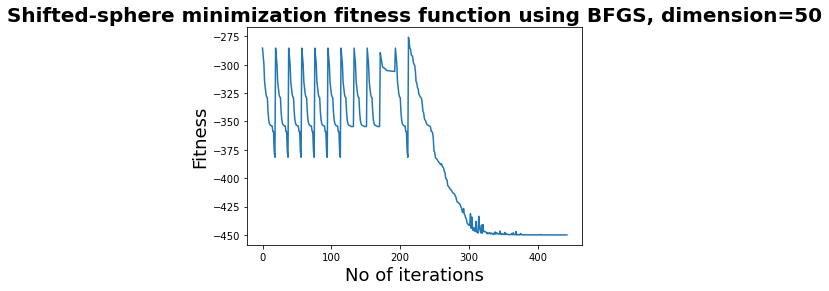

In [34]:
# Plot value of the fitness function 
plt.title("Shifted-sphere minimization fitness function using BFGS, dimension=50",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history)

Let's now optimize the sphere function at dimension 500 using again the BFGS algorithm

In [35]:
#Define dimension, shift and initial solution proposal
d500 = 500
shift  = np.random.uniform(-100,100,d500)
x_0_500 = np.random.uniform(-100,100,d500)

In [36]:
# Define the boundairies of the shifted sphere function
min_bound_500 = -100 * np.ones(d500)
max_bound_500 = 100 * np.ones(d500)
bounds_500 = (min_bound_500, max_bound_500)

In [42]:
res_jac_500 = minimize(shifted_schwefel, x_0_500,jac = jacobian_cost,method='SLSQP', callback=callbackf, options={'disp': True, 'maxiter': MAX_ITER})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -449.9893071163346
            Iterations: 982
            Function evaluations: 3799
            Gradient evaluations: 982


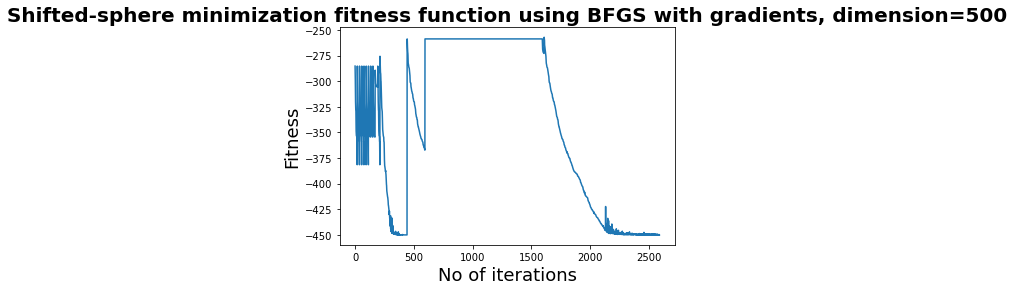

In [43]:
# Plot value of the fitness function 
plt.title("Shifted-sphere minimization fitness function using BFGS with gradients, dimension=500",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history)

We notice that when using the BFGS algorithm with the gradients the minimum is reached at only 3 iterations and 7 function evaluations !

The stopping criterion is the tol (set in our case at 1e-5) meaning the gradient norm must be less than this threshold (tol=gtol for the 'BFGS' algorithm) before successful termination.

We also used the PSO algorithm which works quite well but was more difficult to fine-tune because of it's greater number of parameters. And also it did not converge as quickly as the BFGS algorithm so finally we chose the later one.